# Experiments

In [ ]:
# !pip install wandb

In [ ]:
import datasets
import linear
import loss
import main
import model
import utils

import os
os.environ["WANDB_CONSOLE"] = "off"

import matplotlib.pyplot as plt
import pandas as pd
import wandb
import numpy as np
import seaborn as sns
sns.set(palette="Set2", font_scale=1.3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
api = wandb.Api()
wandb.init(entity="m1p_research")

## Baseline Reproduction

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "Contrastive" \
    --root "/content/" \
    --root_out "/content/logs_biased" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --batch_size 512 \
    --epochs 50

In [ ]:
# Training SimCLR with DebiasedNeg loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedNeg" \
    --root "/content/" \
    --root_out "/content/logs_debiased" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --batch_size 512 \
    --epochs 50

In [ ]:
# Training SimCLR with DebiasedPosV2 loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedPosV2" \
    --root "/content/" \
    --root_out "/content/logs" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --batch_size 512 \
    --epochs 50

## Drop False Negatives

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "Contrastive" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_dropfn_contrastive" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --drop_fn \
    --batch_size 512 \
    --epochs 50

In [ ]:
# Training SimCLR with DebiasedNeg loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedNeg" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_dropfn_debiasedneg" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --drop_fn \
    --batch_size 512 \
    --epochs 50

In [ ]:
# Training SimCLR with DebiasedPosV2 loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedPosV2" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_dropfn_debiasedpos" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --drop_fn \
    --batch_size 512 \
    --epochs 50

## Add False Positives

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "Contrastive" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_noise_contrastive" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --noise_frac 0.3 \
    --batch_size 512 \
    --epochs 50

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedNeg" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_noise_debiasedneg" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --noise_frac 0.3 \
    --batch_size 512 \
    --epochs 50

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedPosV2" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_noise_debiasedpos" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --noise_frac 0.3 \
    --batch_size 512 \
    --epochs 50

## M = 2

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "Contrastive" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_M2_contrastive" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --num_pos 2 \
    --batch_size 512 \
    --epochs 50

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedNeg" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_M2_debiasedneg" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --num_pos 2 \
    --batch_size 512 \
    --epochs 50

In [ ]:
# Training SimCLR with Contrastive loss on CIFAR10
!python main.py \
    --dataset "CIFAR10" \
    --loss "DebiasedPosV2" \
    --root "/content/" \
    --root_out "/content/drive/MyDrive/logs_M2_debiasedpos" \
    --wandb_project "chingyaoc-dcl" \
    --model_arch "resnet18" \
    --cuda \
    --num_pos 2 \
    --batch_size 512 \
    --epochs 50

## Plots


In [ ]:
colors_map = {"DebiasedPos": "lightcoral", "DebiasedNeg": "turquoise", "Contrastive": "sandybrown"}
biased, debiasedneg, debiasedpos = [], [], []
biased.append(pd.read_csv("/content/biased.csv")["cifar10-resnet18-biased - acc1"])
biased.append(pd.read_csv("/content/biased5.csv")["cifar10-resnet18-biased - acc5"])
debiasedneg.append(pd.read_csv("/content/debiasedneg.csv")["cifar10-resnet18-debiasedNeg - acc1"])
debiasedneg.append(pd.read_csv("/content/debiasedneg5.csv")["cifar10-resnet18-debiasedNeg - acc5"])
debiasedpos.append(pd.read_csv("/content/debiasedpos.csv")["cifar10-resnet18-debiasedPos - acc1"])
debiasedpos.append(pd.read_csv("/content/debiasedpos5.csv")["cifar10-resnet18-debiasedPos - acc5"])
runs = api.runs("chingyaoc-dcl")
df = pd.DataFrame.from_records([r.config for r in runs])
len(runs)

12

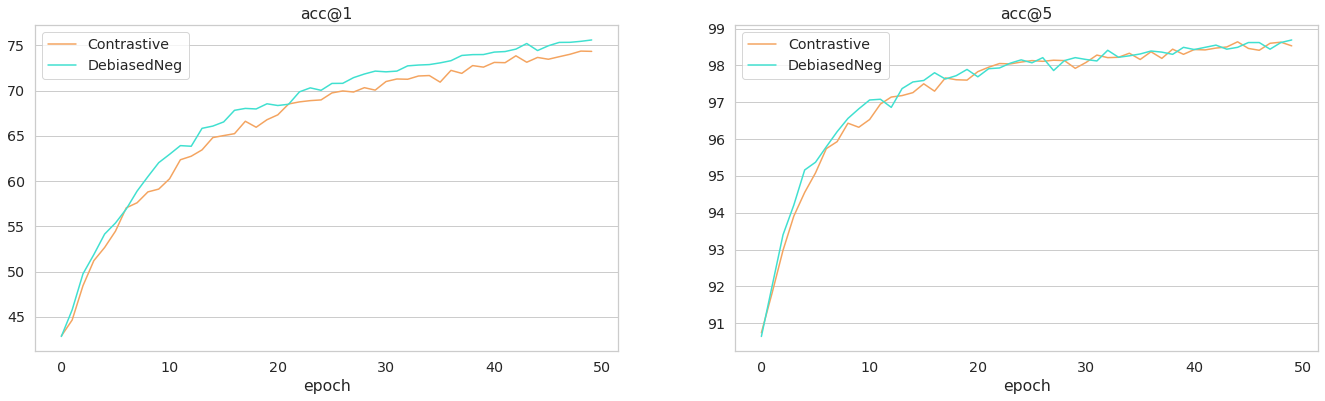

In [ ]:
# base
sns.set_style("whitegrid")
names = ["Contrastive", "DebiasedNeg", "DebiasedPos"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 6))
for i, (ax, metric) in enumerate(zip([ax1, ax2], ["acc1", "acc5"])):
    ax.plot(biased[i], color=colors_map[names[0]], label=names[0])
    ax.plot(debiasedneg[i], color=colors_map[names[1]], label=names[1])
    ax.legend()
    ax.set_xlabel("epoch")
    ax.grid(axis = "x")
ax1.set_title("acc@1")
ax2.set_title("acc@5")
# plt.suptitle("Accuracy with dropped FN", y=0.95)
plt.savefig("plots/base.png", bbox_inches="tight")
plt.show()

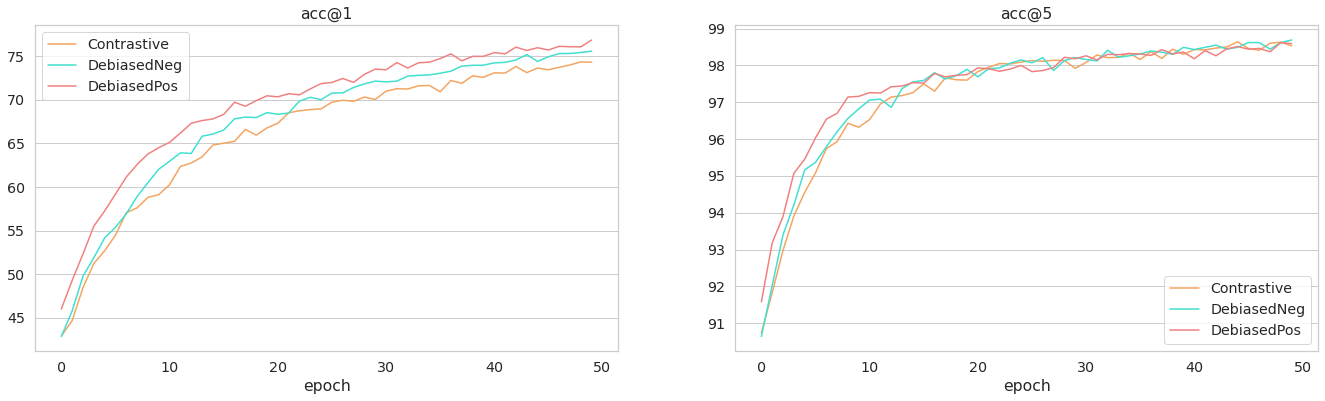

In [ ]:
# base + debiasedPos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 6))
for i, (ax, metric) in enumerate(zip([ax1, ax2], ["acc1", "acc5"])):
    ax.plot(biased[i], color=colors_map[names[0]], label=names[0])
    ax.plot(debiasedneg[i], color=colors_map[names[1]], label=names[1])
    ax.plot(debiasedpos[i], color=colors_map[names[2]], label=names[2])
    ax.legend()
    ax.set_xlabel("epoch")
    ax.grid(axis = "x")
ax1.set_title("acc@1")
ax2.set_title("acc@5")
# plt.suptitle("Accuracy with dropped FN", y=0.95)
plt.savefig("plots/base_debiasedPos.png", bbox_inches="tight")
plt.show()

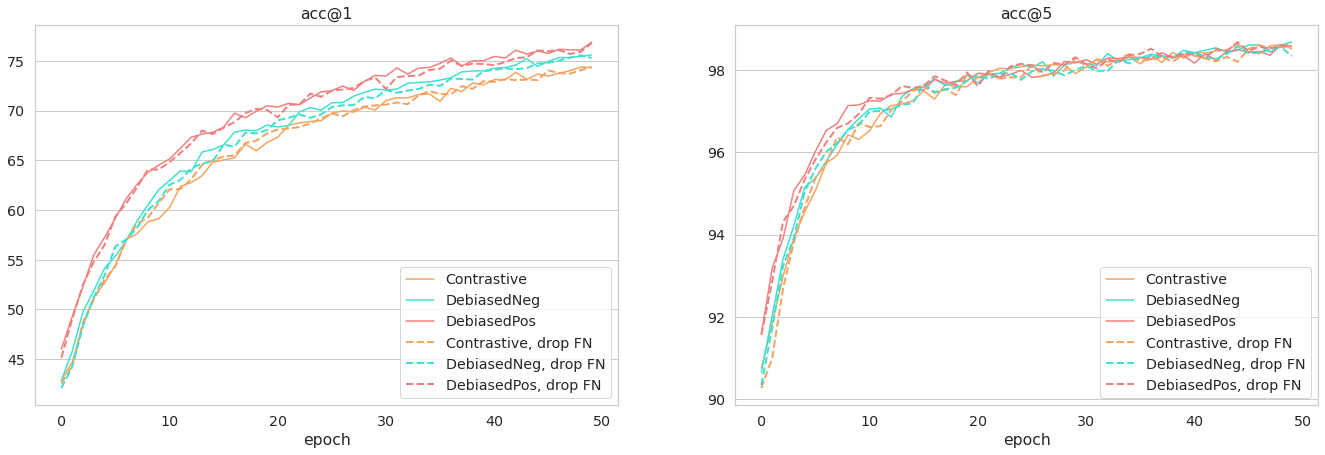

In [ ]:
# base vs. dropfn
names_dropfn = [n + ", drop FN" for n in names]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 7))
for i, (ax, metric) in enumerate(zip([ax1, ax2], ["acc1", "acc5"])):
    ax.plot(biased[i], color=colors_map[names[0]], label=names[0])
    ax.plot(debiasedneg[i], color=colors_map[names[1]], label=names[1])
    ax.plot(debiasedpos[i], color=colors_map[names[2]], label=names[2])
    ax.plot(runs[8].history()[metric], color=colors_map[names[0]], lw=2, linestyle="--", label=names_dropfn[0])
    ax.plot(runs[7].history()[metric], color=colors_map[names[1]], lw=2, linestyle="--", label=names_dropfn[1])
    ax.plot(runs[6].history()[metric], color=colors_map[names[2]], lw=2, linestyle="--", label=names_dropfn[2])
    ax.legend()
    ax.set_xlabel("epoch")
    ax.grid(axis = "x")
ax1.set_title("acc@1")
ax2.set_title("acc@5")
# plt.suptitle("Accuracy with dropped FN", y=0.95)
plt.savefig("plots/base_vs_dropfn.png", bbox_inches="tight")
plt.show()

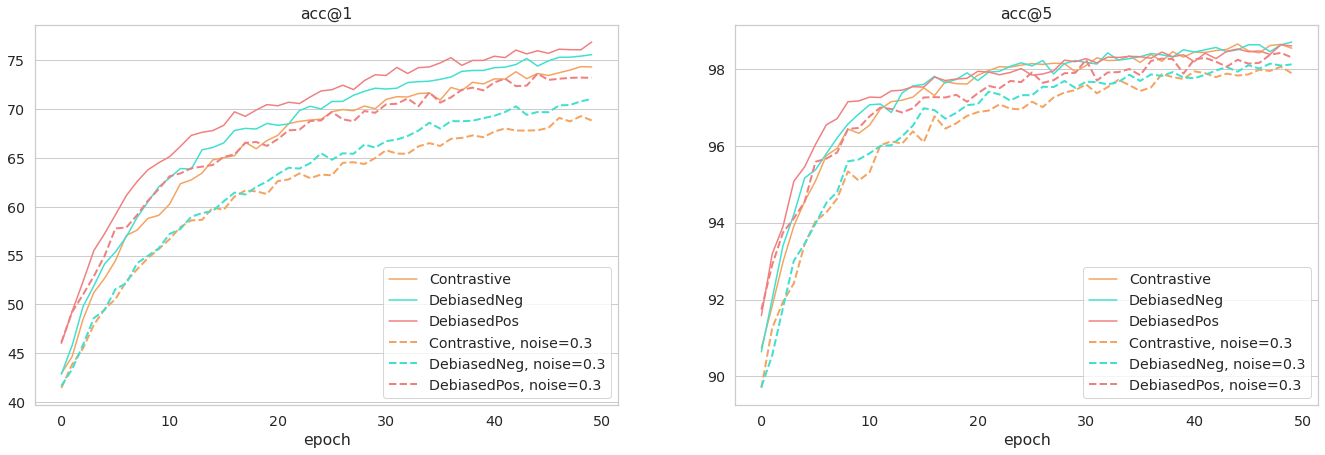

In [ ]:
# base vs. noise 0.3
names_noise = [n + ", noise=0.3" for n in names]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 7))
for i, (ax, metric) in enumerate(zip([ax1, ax2], ["acc1", "acc5"])):
    ax.plot(biased[i], color=colors_map[names[0]], label=names[0])
    ax.plot(debiasedneg[i], color=colors_map[names[1]], label=names[1])
    ax.plot(debiasedpos[i], color=colors_map[names[2]], label=names[2])
    ax.plot(runs[5].history()[metric], color=colors_map[names[0]], lw=2, linestyle="--", label=names_noise[0])
    ax.plot(runs[4].history()[metric], color=colors_map[names[1]], lw=2, linestyle="--", label=names_noise[1])
    ax.plot(runs[3].history()[metric], color=colors_map[names[2]], lw=2, linestyle="--", label=names_noise[2])
    ax.legend()
    ax.set_xlabel("epoch")
    ax.grid(axis = "x")
ax1.set_title("acc@1")
ax2.set_title("acc@5")
# plt.suptitle("Accuracy with increased FP", y=0.95)
plt.savefig("plots/base_vs_noise.png", bbox_inches="tight")
plt.show()

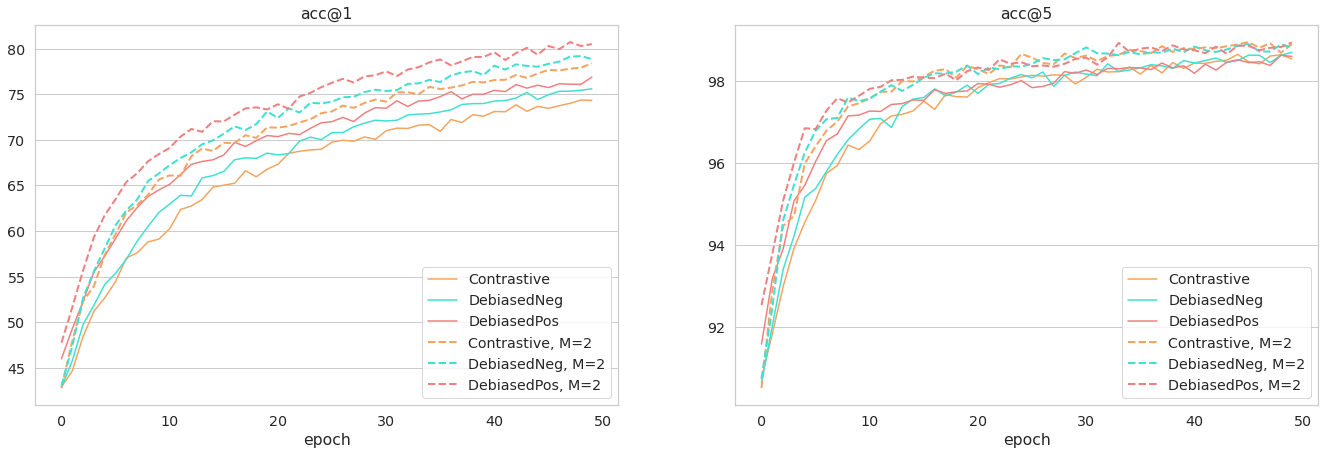

In [ ]:
# base vs. M=2
names_numpos= [n + ", M=2" for n in names]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23, 7))
for i, (ax, metric) in enumerate(zip([ax1, ax2], ["acc1", "acc5"])):
    ax.plot(biased[i], color=colors_map[names[0]], label=names[0])
    ax.plot(debiasedneg[i], color=colors_map[names[1]], label=names[1])
    ax.plot(debiasedpos[i], color=colors_map[names[2]], label=names[2])
    ax.plot(runs[2].history()[metric], color=colors_map[names[0]], lw=2, linestyle="--", label=names_numpos[0])
    ax.plot(runs[1].history()[metric], color=colors_map[names[1]], lw=2, linestyle="--", label=names_numpos[1])
    ax.plot(runs[0].history()[metric], color=colors_map[names[2]], lw=2, linestyle="--", label=names_numpos[2])
    ax.legend()
    ax.set_xlabel("epoch")
    ax.grid(axis = "x")
ax1.set_title("acc@1")
ax2.set_title("acc@5")
# plt.suptitle("Accuracy with increased positive sample size M", y=0.95)
plt.savefig("plots/base_vs_M=2.png", bbox_inches="tight")
plt.show()